ABASS-ALESINLOYE OLUWATOBI
HAMOYE ID: 146eb423f281f000
HAMOYE AI STAGE E GRADE QUIZ

In [ ]:
#Installing Facebook Prophet library
pip install pystan fbprophet

In [7]:
#Importing libraries and reading data
import pandas as pd
from fbprophet import Prophet
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [8]:
#Convert FullDate to datetime format and set as index
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace = True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [9]:
#Check for missing values
df.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [10]:
#Downsampling from hours to days (i.e, daily sampling rate)
df_day = df.resample('M').mean()
df_day.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-30,16.906667,1578.145819,3.578663,25.075896
2010-10-31,21.377419,1398.027708,2.799987,22.223629
2010-11-30,24.323333,1484.759104,2.321943,22.575944
2010-12-31,26.696774,1082.167586,2.401429,17.585753
2011-01-31,30.629032,1331.477822,2.917977,103.094603


In [19]:
#Augmented Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_day['GasPrice'])
print(f'ADF Statistic = {result[0]}')
print(f'p-value of SysLoad to 6 decimal places = {round(result[1], 6)}')
print('critical values are: ')
for k, v in result[4].items():
    print(f'{k} : {v}')

ADF Statistic = -1.7019939817423997
p-value of SysLoad to 6 decimal places = 0.430085
critical values are: 
1% : -3.485585145896754
5% : -2.885738566292665
10% : -2.5796759080663887


In [22]:
result = adfuller(df_day['ElecPrice'])
print(f'ADF Statistic = {result[0]}')
print(f'p-value = {round(result[1], 6)}')
print(f'Number of lags used = {result[2]}')
print(f'Number of Observations = {result[3]}')
print('critical values are: ')
for k, v in result[4].items():
    print(f'{k} : {v}')

ADF Statistic = -3.8539708618723143
p-value = 0.002401
Number of lags used = 1
Number of Observations = 124
critical values are: 
1% : -3.484219653271961
5% : -2.885145235641637
10% : -2.579359138917794


In [23]:
#Resetting index and creating new data set
df_day_copy = df_day.copy().reset_index()
df_day_copy = df_day_copy[['FullDate', 'ElecPrice']].rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y'})
df_day_copy.head()

,ds,y
0,2010-09-30,25.075896
1,2010-10-31,22.223629
2,2010-11-30,22.575944
3,2010-12-31,17.585753
4,2011-01-31,103.094603


In [24]:
#Split dataset into train(first 2757) and test (x-2757), where x = length of dataset
x_train, x_test = df_day_copy[:2757], df_day_copy[2757:]
y_train, y_test = df_day_copy.y[:2757], df_day_copy.y[2757:]

In [25]:
#Training model using the Facebook Prophet module
model = Prophet()
model.fit(x_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
#Predicting using the length of test dataset
future = model.make_future_dataframe(len(x_test), freq = 'D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-30,38.105274,-13.547645,65.597129,38.105274,38.105274,-10.432207,-10.432207,-10.432207,-10.432207,-10.432207,-10.432207,0.0,0.0,0.0,27.673066
1,2010-10-31,38.635501,-14.419889,67.951686,38.635501,38.635501,-12.554790,-12.554790,-12.554790,-12.554790,-12.554790,-12.554790,0.0,0.0,0.0,26.080711
2,2010-11-30,39.148625,-15.969037,67.373048,39.148625,39.148625,-11.736193,-11.736193,-11.736193,-11.736193,-11.736193,-11.736193,0.0,0.0,0.0,27.412432
3,2010-12-31,39.678853,-6.989256,73.703440,39.678853,39.678853,-6.777847,-6.777847,-6.777847,-6.777847,-6.777847,-6.777847,0.0,0.0,0.0,32.901006
4,2011-01-31,40.209080,20.547424,103.175922,40.209080,40.209080,21.214084,21.214084,21.214084,21.214084,21.214084,21.214084,0.0,0.0,0.0,61.423164


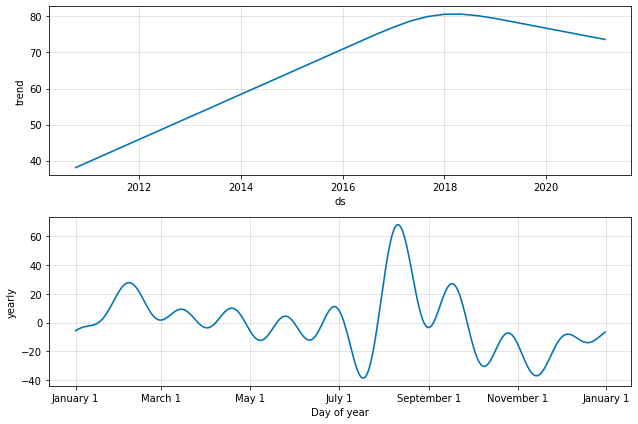

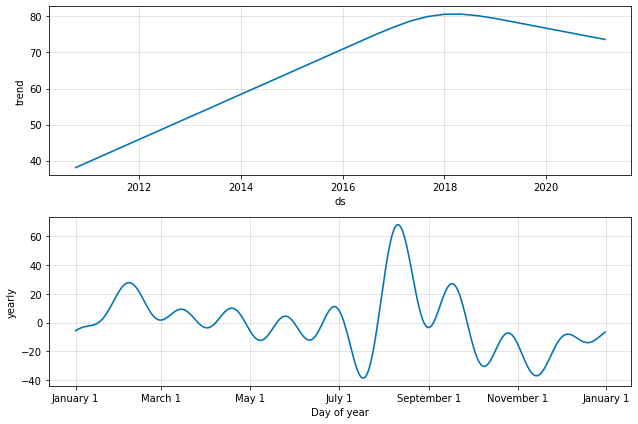

In [27]:
model.plot_components(forecast)

In [29]:
#Second training of model using regressors (SysLoad, Tmax and GasPrice as add1, add2 and add3 respectively)
df_reg = df_day.copy().reset_index()
df_reg = df_reg.rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})
df_reg.head()

,ds,add2,add1,add3,y
0,2010-09-30,16.906667,1578.145819,3.578663,25.075896
1,2010-10-31,21.377419,1398.027708,2.799987,22.223629
2,2010-11-30,24.323333,1484.759104,2.321943,22.575944
3,2010-12-31,26.696774,1082.167586,2.401429,17.585753
4,2011-01-31,30.629032,1331.477822,2.917977,103.094603


In [32]:
#Split dataset as done previously
df_reg_train, df_reg_test = df_reg[:2757], df_reg[2757:]
df_reg_y_train, df_reg_y_test = df_reg.y[:2757], df_reg.y[2757:]
df_reg_train.isnull().sum()

ds      0
add2    0
add1    0
add3    0
y       0
dtype: int64

In [33]:
#Training model while adding the regressors into the dataset
model_reg = Prophet()
model_reg.add_regressor('add1')
model_reg.add_regressor('add2')
model_reg.add_regressor('add3')
model_reg.fit(df_reg_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future_reg = model_reg.make_future_dataframe(periods = len(df_reg_test), freq = 'D')
future_reg['add1'] = df_reg_train['add1']
future_reg['add2'] = df_reg_train['add2']
future_reg['add3'] = df_reg_train['add3']
future_reg

,ds,add1,add2,add3
0,2010-09-30,1578.145819,16.906667,3.578663
1,2010-10-31,1398.027708,21.377419,2.799987
2,2010-11-30,1484.759104,24.323333,2.321943
3,2010-12-31,1082.167586,26.696774,2.401429
4,2011-01-31,1331.477822,30.629032,2.917977
...,...,...,...,...
121,2020-10-31,123.116935,21.374194,5.571003
122,2020-11-30,20.694651,27.986667,6.032180
123,2020-12-31,-47.401751,25.525806,6.333106
124,2021-01-31,64.803990,27.896774,6.411629


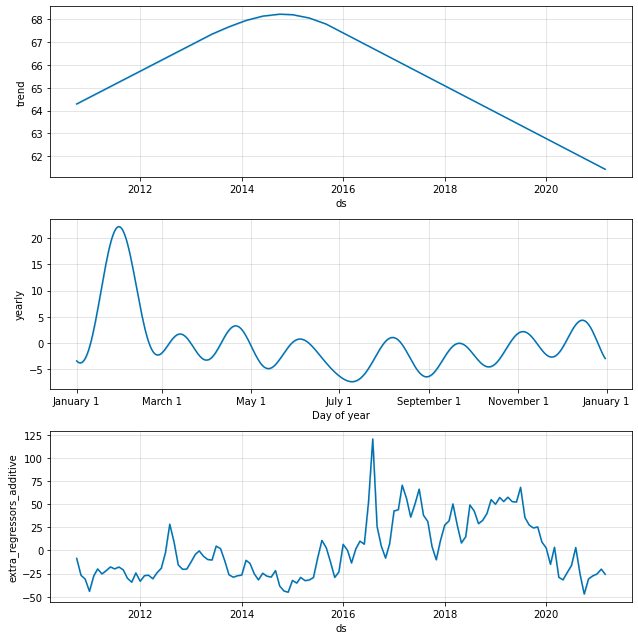

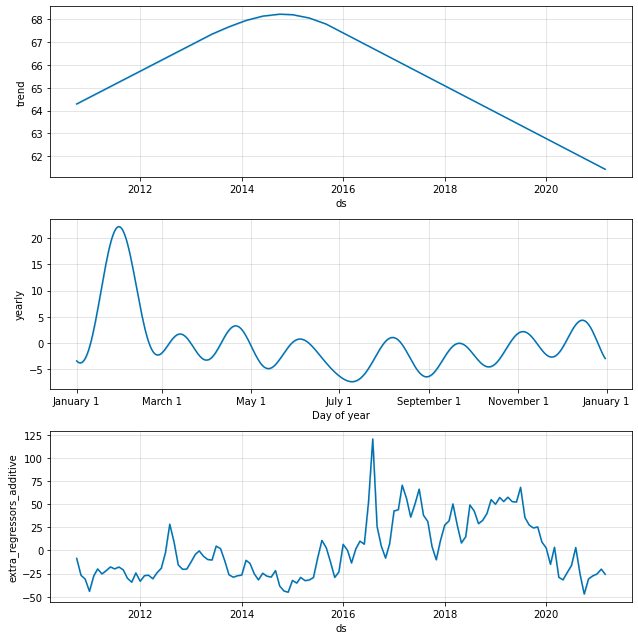

In [50]:
forwardfill_future_reg = future_reg.fillna(method='ffill')
forwardfill_forecast_reg = model_reg.predict(forwardfill_future_reg)
model_reg.plot_components(forwardfill_forecast_reg)

In [38]:
#Third model training with regressors SysLoad(add1) and GasPrice(add3)
df_reg2 = df_day.copy().reset_index()
df_reg2 = df_reg2.rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})

In [39]:
#Splitting data into train and test
df_reg2_train, df_reg2_test = df_reg2[:2757], df_reg2[2757:]
df_reg2_train_y, df_reg2_test_y = df_reg.y[:2757], df_reg.y[2757:]

In [40]:
#Training using Prophet and adding the two regressors
model_reg2 = Prophet()
model_reg2.add_regressor('add1')
model_reg2.add_regressor('add3')
model_reg2.fit(df_reg2_train)
future_reg2 = model_reg2.make_future_dataframe(len(df_reg_test), freq = 'D')
future_reg2['add1'] = df_reg2_train['add1']
future_reg2['add3'] = df_reg2_train['add3']
future_reg2 = future_reg2.fillna(method='ffill')
#Predict for the next 12 months
forecast_reg2 = model_reg2.predict(future_reg2)
forecast_reg2

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-30,63.590467,31.444901,79.694798,63.590467,63.590467,29.651411,29.651411,29.651411,-36.692739,...,-7.041328,-7.041328,-7.041328,-1.292163,-1.292163,-1.292163,0.0,0.0,0.0,55.256976
1,2010-10-31,63.701047,14.528549,65.706728,63.701047,63.701047,22.803097,22.803097,22.803097,-48.415890,...,-25.612793,-25.612793,-25.612793,1.576478,1.576478,1.576478,0.0,0.0,0.0,39.664732
2,2010-11-30,63.808060,6.301325,57.696042,63.808060,63.808060,26.100733,26.100733,26.100733,-55.612950,...,-29.512218,-29.512218,-29.512218,-1.920029,-1.920029,-1.920029,0.0,0.0,0.0,32.375814
3,2010-12-31,63.918640,-7.569066,42.721737,63.918640,63.918640,10.793704,10.793704,10.793704,-54.416275,...,-43.622570,-43.622570,-43.622570,-3.292130,-3.292130,-3.292130,0.0,0.0,0.0,17.003940
4,2011-01-31,64.029221,36.968598,85.693716,64.029221,64.029221,20.272788,20.272788,20.272788,-46.639519,...,-26.366730,-26.366730,-26.366730,22.302296,22.302296,22.302296,0.0,0.0,0.0,59.964786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2020-10-31,63.339975,6.634380,58.319348,63.339975,63.339975,-25.670589,-25.670589,-25.670589,-6.697600,...,-32.368189,-32.368189,-32.368189,1.774676,1.774676,1.774676,0.0,0.0,0.0,32.746461
122,2020-11-30,63.274099,5.910490,58.644598,63.274099,63.274099,-29.564812,-29.564812,-29.564812,0.245524,...,-29.319288,-29.319288,-29.319288,-1.133649,-1.133649,-1.133649,0.0,0.0,0.0,32.821163
123,2020-12-31,63.206028,5.781029,58.247010,63.206028,63.206028,-32.153921,-32.153921,-32.153921,4.776041,...,-27.377880,-27.377880,-27.377880,-3.536287,-3.536287,-3.536287,0.0,0.0,0.0,32.291862
124,2021-01-31,63.137957,36.707049,86.862078,63.137957,63.137957,-27.887720,-27.887720,-27.887720,5.958217,...,-21.929503,-21.929503,-21.929503,21.544923,21.544923,21.544923,0.0,0.0,0.0,62.753377


In [51]:
#Measuring model without regressor performance using MAPE, RMSE
import numpy as np
def mape(actual, predicted):
  actual, predicted = np.array(actual), np.array(predicted)
  return np.mean(np.abs((actual - predicted) / actual)) * 100
actual = y_train
predicted = forecast['yhat'][:2757]
mape(actual, predicted)

44.00918305563158

In [43]:
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

31.157858608235458


In [53]:
#Measuring regressor model using MAPE and RMSE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
actual_reg = df_reg_y_train
pred_reg = forwardfill_forecast_reg['yhat'][:2757]
mape(actual_reg, pred_reg)

25.685354879419954

In [52]:
actual_reg = y_train
predicted_reg = forwardfill_forecast_reg['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual_reg, pred_reg)

rmse = math.sqrt(mse)

print(rmse)

19.838671474667844


In [48]:
#Measuring performance of Model without Tmax
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
actual_reg2 = df_reg2_train_y
pred_reg2 = forecast_reg2['yhat'][:2757]
mape(actual_reg2, pred_reg2)

25.63746908936594

In [49]:
actual_reg2 = df_reg2_train_y
pred_reg2 = forecast_reg2['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual_reg2, pred_reg2)

rmse = math.sqrt(mse)

print(rmse)

19.847143513895883
